In [34]:
import torch
import torch.optim as optim
import torch.nn as nn
import matplotlib.pyplot as plt
import torch
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import time

# Data
t_c = torch.tensor([0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0])
t_u = torch.tensor([35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4])

# Normalization
t_u = t_u / 100

#1a

# Nonlinear model
def model(t_u, w2, w1, b):
    return w2 * t_u**2 + w1 * t_u + b

# Loss function
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

In [35]:
#1b
best_loss = float('inf')
best_params = None
best_lr = None

learning_rates = [0.01, 0.001, 0.0005, 0.0001]
epochs = 5000

for lr in learning_rates:
    print(f"\nTraining with learning rate = {lr}")

    # Initialize parameters
    params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
    optimizer = optim.SGD([params], lr=lr)

    for epoch in range(epochs + 1):
        t_p = model(t_u, *params)
        loss = loss_fn(t_p, t_c)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if epoch % 500 == 0:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
    final_loss = loss.item()
    if final_loss < best_loss:
        best_loss = final_loss
        best_params = params.detach().clone()
        best_lr = lr

print(f"\n Best learning rate: {best_lr}, Final loss: {best_loss:.4f}")


Training with learning rate = 0.01
Epoch 0, Loss 165.449524
Epoch 500, Loss 26.227516
Epoch 1000, Loss 12.932303
Epoch 1500, Loss 6.960460
Epoch 2000, Loss 4.278070
Epoch 2500, Loss 3.073214
Epoch 3000, Loss 2.532033
Epoch 3500, Loss 2.288948
Epoch 4000, Loss 2.179760
Epoch 4500, Loss 2.130716
Epoch 5000, Loss 2.108688

Training with learning rate = 0.001
Epoch 0, Loss 165.449524
Epoch 500, Loss 58.775345
Epoch 1000, Loss 48.338402
Epoch 1500, Loss 44.389854
Epoch 2000, Loss 41.112152
Epoch 2500, Loss 38.110195
Epoch 3000, Loss 35.340588
Epoch 3500, Loss 32.784004
Epoch 4000, Loss 30.424023
Epoch 4500, Loss 28.245495
Epoch 5000, Loss 26.234472

Training with learning rate = 0.0005
Epoch 0, Loss 165.449524
Epoch 500, Loss 81.605339
Epoch 1000, Loss 58.788731
Epoch 1500, Loss 51.554543
Epoch 2000, Loss 48.340267
Epoch 2500, Loss 46.202450
Epoch 3000, Loss 44.390232
Epoch 3500, Loss 42.710575
Epoch 4000, Loss 41.112427
Epoch 4500, Loss 39.580917
Epoch 5000, Loss 38.110477

Training with 

In [36]:
#1c
def linear_model(t_u, w, b):
    return w * t_u + b

params_lin = torch.tensor([1.0, 0.0], requires_grad=True)
optimizer_lin = optim.SGD([params_lin], lr=0.01)

for epoch in range(5000):
    t_p = linear_model(t_u, *params_lin)
    loss = loss_fn(t_p, t_c)
    optimizer_lin.zero_grad()
    loss.backward()
    optimizer_lin.step()

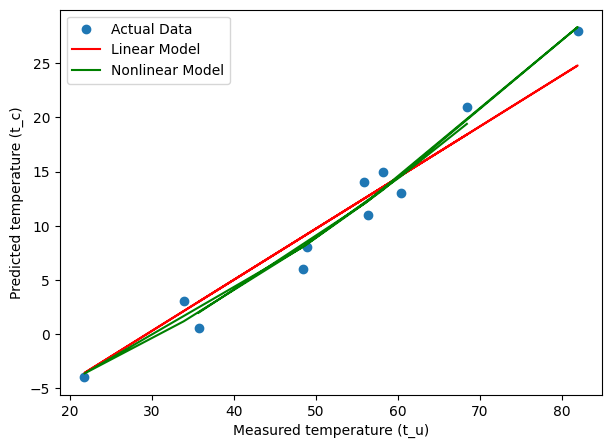

In [37]:
t_p_lin = linear_model(t_u, *params_lin).detach()
t_p_nonlin = model(t_u, *best_params).detach()
plt.figure(figsize=(7,5))
plt.scatter(t_u * 100, t_c, label='Actual Data')
plt.plot(t_u * 100, t_p_lin, label='Linear Model', color='red')
plt.plot(t_u * 100, t_p_nonlin, label='Nonlinear Model', color='green')
plt.xlabel('Measured temperature (t_u)')
plt.ylabel('Predicted temperature (t_c)')
plt.legend()
plt.show()

In [38]:
#2a
#Importing Data
url= 'https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/refs/heads/main/Dataset/Housing.csv'
house = pd.read_csv(url)
print(house.head())
house.isnull().sum()*100/house.shape[0]

categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
for col in categorical_cols:
    house[col] = house[col].map({'yes':1, 'no':0})


features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
target = 'price'

X = house[features].values
y = house[target].values.reshape(-1, 1)

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [39]:
#Preprocessing
scaler_X = StandardScaler()
X_std = scaler_X.fit_transform(X)

scaler_X_norm = MinMaxScaler()
X_scaled = scaler_X_norm.fit_transform(X_std)

scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y)

X_train, X_val, y_train, y_val = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_val = torch.tensor(X_val, dtype=torch.float32)
y_val = torch.tensor(y_val, dtype=torch.float32)


In [40]:
#Model
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(5, 1)  # 5 input features → 1 output (price)

    def forward(self, x):
        return self.linear(x)

#Accuracy
def accuracy(y_pred, y_val, tolerance=0.1):
        with torch.no_grad():
          ss_res = ((y_val - y_pred) ** 2).sum()
          ss_tot = ((y_val - y_val.mean()) ** 2).sum()
          acc = (1 - ss_res / ss_tot).item()
          return acc

In [41]:
#2b
best_val_loss = float('inf')
best_model_state = None
best_lr = None
best_accuracy = None

learning_rates = [0.01, 0.001, 0.0005, 0.0001]
epochs = 5000

for lr in learning_rates:
    print(f"\nTraining with learning rate = {lr}")

    # Initialize parameters
    model = LinearRegressionModel()
    optimizer = optim.SGD(model.parameters(), lr=lr)

    for epoch in range(epochs + 1):
        model.train()
        optimizer.zero_grad()
        y_pred = model(X_train)
        loss = loss_fn(y_pred, y_train)
        loss.backward()
        optimizer.step()

        if epoch % 500 == 0:
          model.eval()
          with torch.no_grad():
            y_val_pred = model(X_val)
            val_loss = loss_fn(y_val_pred, y_val)
            val_acc = accuracy(y_val_pred, y_val)
            print('Epoch %d, Loss %f, Accuracy %f' % (epoch, float(loss), float(val_acc)))
    final_loss = loss.item()
    if val_loss.item() < best_val_loss:
        best_val_loss = val_loss.item()
        best_accuracy = val_acc*100
        best_lr = lr
        best_model_state = model.state_dict().copy()

print(f"\n Best learning rate: {best_lr}, Best validation loss: {best_val_loss:.4f}, Best accuracy: {best_accuracy:.2f}%")


Training with learning rate = 0.01
Epoch 0, Loss 1.030569, Accuracy -0.146234
Epoch 500, Loss 0.630404, Accuracy 0.271136
Epoch 1000, Loss 0.509762, Accuracy 0.407120
Epoch 1500, Loss 0.459562, Accuracy 0.464852
Epoch 2000, Loss 0.432726, Accuracy 0.494276
Epoch 2500, Loss 0.416473, Accuracy 0.511152
Epoch 3000, Loss 0.406140, Accuracy 0.521582
Epoch 3500, Loss 0.399449, Accuracy 0.528370
Epoch 4000, Loss 0.395081, Accuracy 0.532966
Epoch 4500, Loss 0.392217, Accuracy 0.536181
Epoch 5000, Loss 0.390331, Accuracy 0.538493

Training with learning rate = 0.001
Epoch 0, Loss 1.111958, Accuracy -0.104017
Epoch 500, Loss 0.944753, Accuracy -0.037127
Epoch 1000, Loss 0.876743, Accuracy 0.010471
Epoch 1500, Loss 0.822880, Accuracy 0.059511
Epoch 2000, Loss 0.776478, Accuracy 0.105129
Epoch 2500, Loss 0.736169, Accuracy 0.146025
Epoch 3000, Loss 0.701068, Accuracy 0.182343
Epoch 3500, Loss 0.670437, Accuracy 0.214562
Epoch 4000, Loss 0.643650, Accuracy 0.243177
Epoch 4500, Loss 0.620168, Accur

In [42]:
#3a
class NeuralNet_1Hidden(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(5, 8)  # 5 input features -> 8 hidden nodes
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(8, 1)  # 8 -> 1 output (price)

    def forward(self, x):
        return self.fc2(self.relu(self.fc1(x)))


In [43]:
import time

epochs = 200

# Initialize parameters
model = NeuralNet_1Hidden()
optimizer = optim.SGD(model.parameters(), lr=.1)
loss_fn = nn.MSELoss()

start_time = time.time()
for epoch in range(epochs + 1):
    model.train()
    optimizer.zero_grad()
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    loss.backward()
    optimizer.step()

    if epoch % 20 == 0 or epoch == epochs:
      model.eval()
      with torch.no_grad():
        y_val_pred = model(X_val)
        val_loss = loss_fn(y_val_pred, y_val)
        val_acc = accuracy(y_val_pred, y_val)
        print('Epoch %d, Loss %f, Accuracy %f' % (epoch, float(loss), float(val_acc)))
end_time = time.time()
train_time = end_time - start_time

print(f"\nTraining Time: {train_time:.2f} seconds")

Epoch 0, Loss 1.034867, Accuracy -0.001269
Epoch 20, Loss 0.705494, Accuracy 0.180896
Epoch 40, Loss 0.536243, Accuracy 0.364323
Epoch 60, Loss 0.449456, Accuracy 0.470616
Epoch 80, Loss 0.418141, Accuracy 0.511263
Epoch 100, Loss 0.403467, Accuracy 0.527739
Epoch 120, Loss 0.395398, Accuracy 0.535179
Epoch 140, Loss 0.391053, Accuracy 0.539152
Epoch 160, Loss 0.388812, Accuracy 0.541552
Epoch 180, Loss 0.387633, Accuracy 0.543061
Epoch 200, Loss 0.387014, Accuracy 0.544062

Training Time: 0.13 seconds


In [44]:
#3b
class NeuralNet_3Hidden(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(5, 16)
        self.fc2 = nn.Linear(16, 12)
        self.fc3 = nn.Linear(12, 8)
        self.fc4 = nn.Linear(8, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        return self.fc4(x)

In [45]:
import time

epochs = 200

# Initialize parameters
model = NeuralNet_3Hidden()
optimizer = optim.SGD(model.parameters(), lr=.1)
loss_fn = nn.MSELoss()

start_time = time.time()
for epoch in range(epochs + 1):
    model.train()
    optimizer.zero_grad()
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    loss.backward()
    optimizer.step()

    if epoch % 20 == 0 or epoch == epochs:
      model.eval()
      with torch.no_grad():
        y_val_pred = model(X_val)
        val_loss = loss_fn(y_val_pred, y_val)
        val_acc = accuracy(y_val_pred, y_val)
        print('Epoch %d, Loss %f, Accuracy %f' % (epoch, float(loss), float(val_acc)))
end_time = time.time()
train_time = end_time - start_time

print(f"\nTraining Time: {train_time:.2f} seconds")

Epoch 0, Loss 1.052606, Accuracy -0.019188
Epoch 20, Loss 0.884594, Accuracy -0.018458
Epoch 40, Loss 0.877964, Accuracy -0.011591
Epoch 60, Loss 0.871365, Accuracy -0.005130
Epoch 80, Loss 0.844417, Accuracy 0.025624
Epoch 100, Loss 0.745960, Accuracy 0.135864
Epoch 120, Loss 0.498246, Accuracy 0.420601
Epoch 140, Loss 0.411536, Accuracy 0.528732
Epoch 160, Loss 0.524742, Accuracy 0.523954
Epoch 180, Loss 0.450483, Accuracy 0.541035
Epoch 200, Loss 0.432655, Accuracy 0.547486

Training Time: 0.19 seconds
